Task2: Customer Segmentation Using Unsupervised Learning

Step 1: Import Necessary Libraries

In [29]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn for Machine Learning models
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder # <-- ADD LabelEncoder HERE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

Step 2: Load and Explore the Data (.xlsx file)

In [30]:
# Load the .xlsx file
df = pd.read_excel('Mall_Customers.xlsx') # Replace with your actual file name

# Clean the column names by stripping whitespace
df.columns = df.columns.str.strip()  # This line is the fix!

# Display the first 5 rows to understand the data
print(df.head())

# Get basic information about the dataset
print(df.info())

# Get statistical summary of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   CustomerID Gender  Age    Education Marital Status  Annual Income (k$)  \
0           1      M   19  High School        Married                  15   
1           2      M   21     Graduate         Single                  15   
2           3      F   20     Graduate        Married                  16   
3           4      F   23  High School        Unknown                  16   
4           5      F   31   Uneducated        Married                  17   

   Spending Score (1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   

Step 3: Exploratory Data Analysis (EDA)

A. Univariate Analysis (Analyzing single variables)

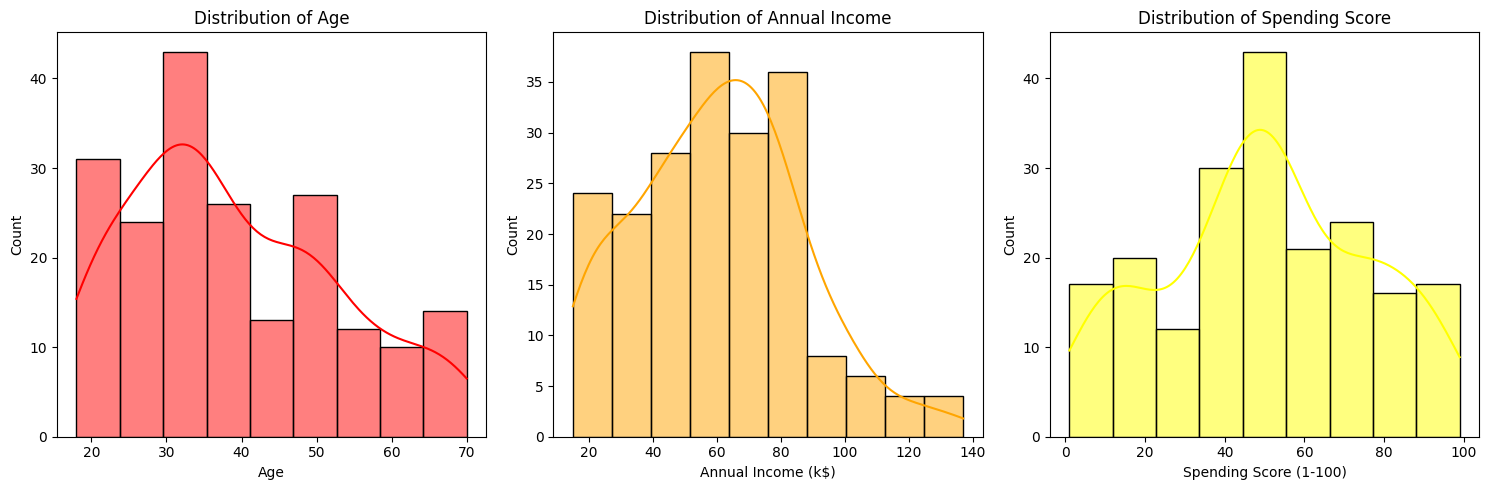

In [15]:
# Plot distributions of key numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color= 'red')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange' )
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color= 'yellow')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

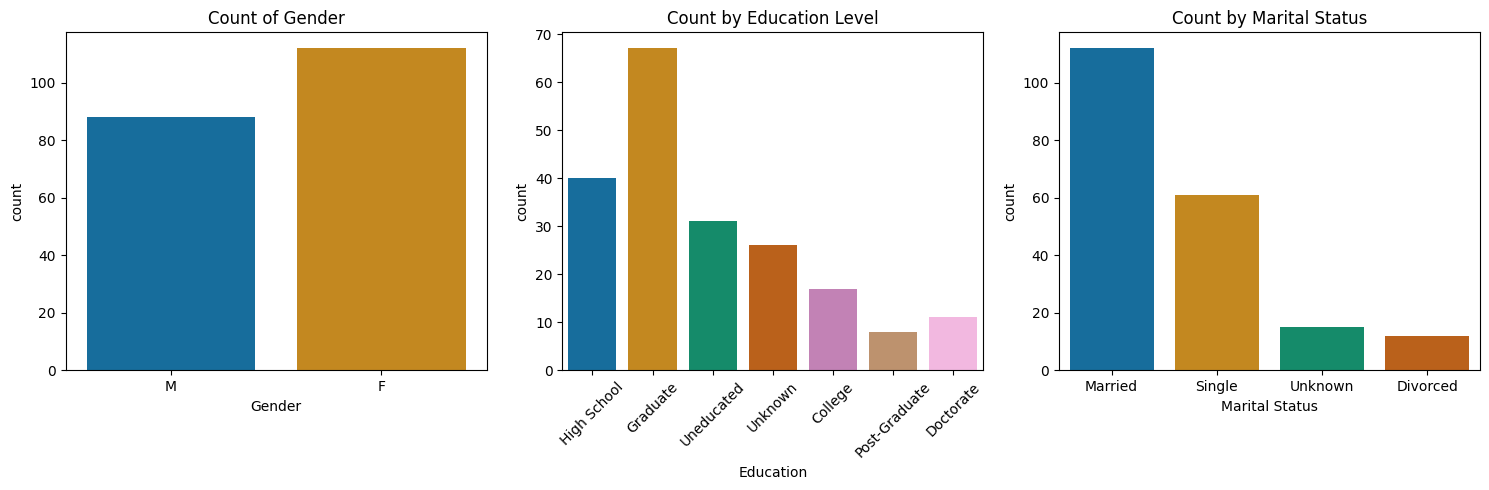

In [26]:
# Plot count of categorical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df, palette='colorblind')
plt.title('Count of Gender')

plt.subplot(1, 3, 2)
sns.countplot(x='Education', data=df, palette='colorblind') # Assuming 'Education' is categorical
plt.title('Count by Education Level')
plt.xticks(rotation=45) # Rotate labels if they are long

plt.subplot(1, 3, 3)
sns.countplot(x='Marital Status', data=df, palette='colorblind') # Assuming 'Marital Status' is categorical
plt.title('Count by Marital Status')

plt.tight_layout()
plt.show()

B. Bivariate Analysis (Analyzing relationships between two variables)

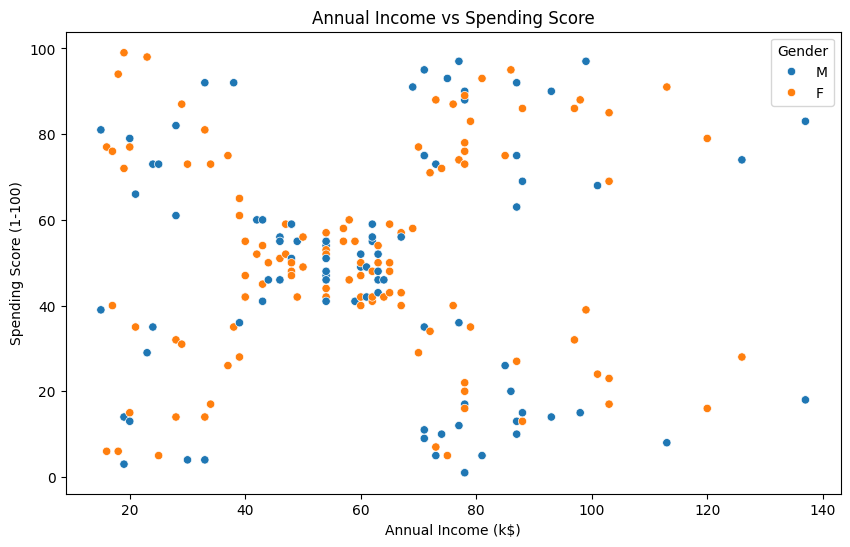

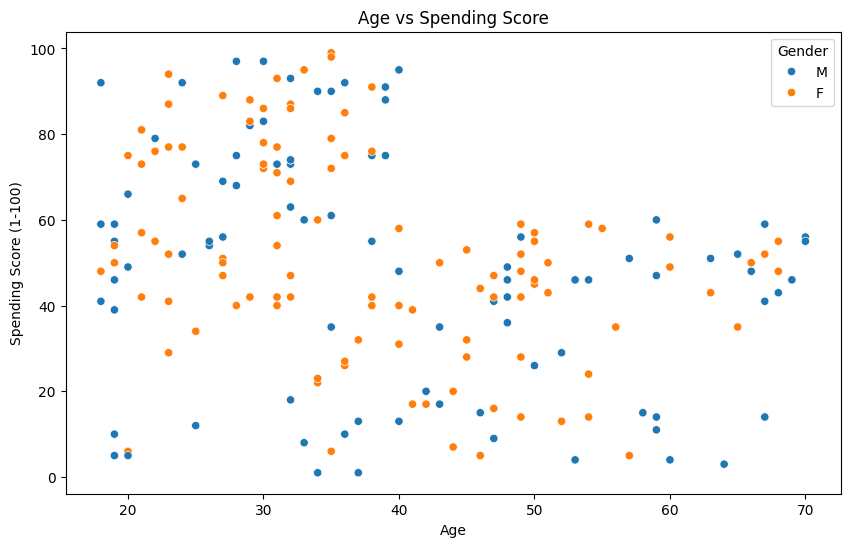

In [27]:
# The most important plot: Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title('Annual Income vs Spending Score')
plt.show()

# Check how Age relates to Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title('Age vs Spending Score')
plt.show()

Step 4: Data Preprocessing for K-Means

1. Handle Categorical Variables:

In [31]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
df_encoded = df.copy() # Create a copy to avoid changing original data
df_encoded['Gender'] = label_encoder.fit_transform(df['Gender']) # e.g., Male=1, Female=0
df_encoded['Education'] = label_encoder.fit_transform(df['Education'])
df_encoded['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

# Drop CustomerID as it's just an identifier and not useful for clustering
df_encoded = df_encoded.drop('CustomerID', axis=1)

print(df_encoded.head())

   Gender  Age  Education  Marital Status  Annual Income (k$)  \
0       1   19          3               1                  15   
1       1   21          2               2                  15   
2       0   20          2               1                  16   
3       0   23          3               3                  16   
4       0   31          5               1                  17   

   Spending Score (1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40  


2. Feature Scaling:

In [32]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_encoded)

# Create a DataFrame of the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
print(scaled_df.head())

     Gender       Age  Education  Marital Status  Annual Income (k$)  \
0  1.128152 -1.424569  -0.022543       -0.553667           -1.738999   
1  1.128152 -1.281035  -0.586122        0.848022           -1.738999   
2 -0.886405 -1.352802  -0.586122       -0.553667           -1.700830   
3 -0.886405 -1.137502  -0.022543        2.249711           -1.700830   
4 -0.886405 -0.563369   1.104615       -0.553667           -1.662660   

   Spending Score (1-100)  
0               -0.434801  
1                1.195704  
2               -1.715913  
3                1.040418  
4               -0.395980  


Step 5: Applying K-Means Clustering

1. Find the Optimal Number of Clusters (k) using the Elbow Method

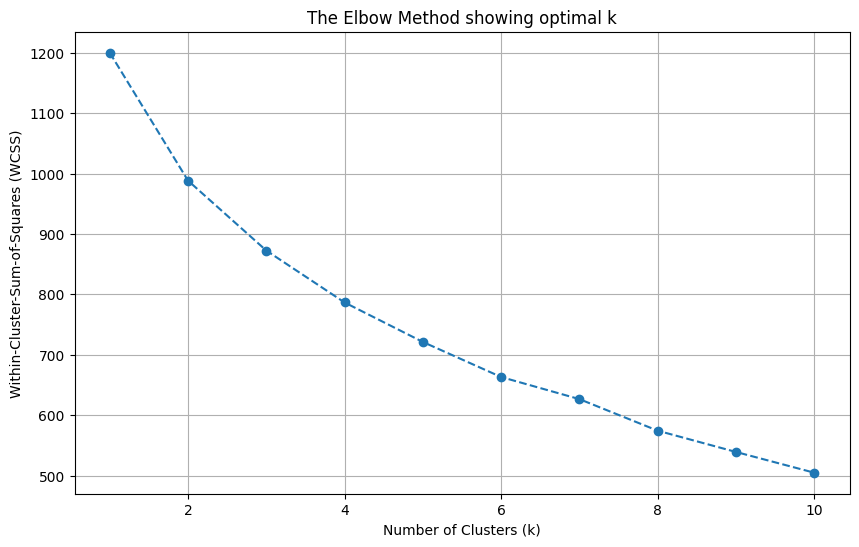

In [33]:
# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different k values
wcss = []
cluster_range = range(1, 11) # Testing k from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('The Elbow Method showing optimal k')
plt.grid(True)
plt.show()

2. Perform K-Means Clustering with the chosen k

In [34]:
# Let's assume the optimal k is 5 (you must choose based on your elbow plot)
optimal_k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the original DataFrame for analysis
df['Cluster'] = clusters
df_encoded['Cluster'] = clusters
print(df.head())

   CustomerID Gender  Age    Education Marital Status  Annual Income (k$)  \
0           1      M   19  High School        Married                  15   
1           2      M   21     Graduate         Single                  15   
2           3      F   20     Graduate        Married                  16   
3           4      F   23  High School        Unknown                  16   
4           5      F   31   Uneducated        Married                  17   

   Spending Score (1-100)  Cluster  
0                      39        1  
1                      81        1  
2                       6        3  
3                      77        3  
4                      40        3  


Step 6: Visualize the Clusters using Dimensionality Reduction (PCA/t-SNE)

A. Using PCA (Principal Component Analysis)

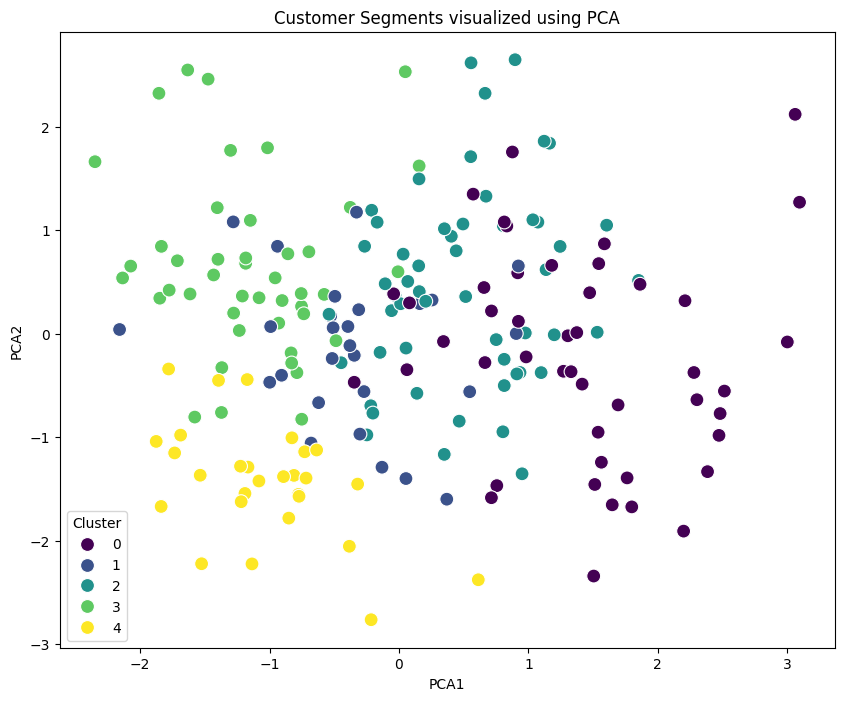

In [35]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Customer Segments visualized using PCA')
plt.legend(title='Cluster')
plt.show()

B. Using t-SNE (often gives better separation)

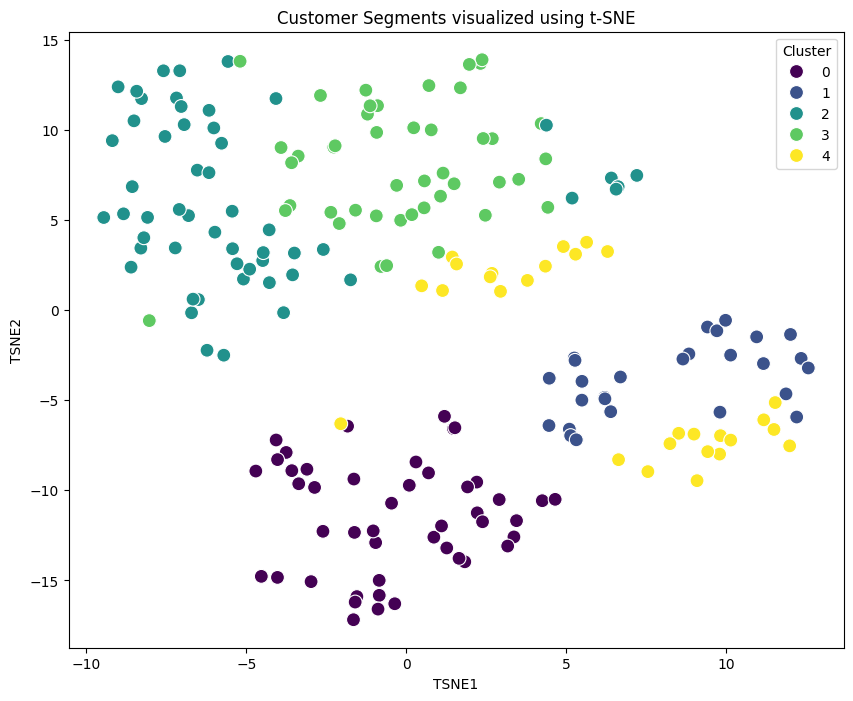

In [36]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_components = tsne.fit_transform(scaled_data)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters

# Plot the clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='viridis', s=100)
plt.title('Customer Segments visualized using t-SNE')
plt.legend(title='Cluster')
plt.show()

Step 7: Analyze the Clusters and Propose Marketing Strategies

In [37]:
# Analyze the mean values of each feature for every cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

# You can also include categorical data by looking at the mode
for cat_col in ['Gender', 'Education', 'Marital Status']:
    print(f"\n{cat_col} distribution per cluster:")
    print(pd.crosstab(df['Cluster'], df[cat_col]))

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        103.500000  50.021739           60.978261               29.043478
1         68.629630  26.629630           46.370370               65.222222
2         99.518519  48.648148           60.925926               36.037037
3         73.577778  27.133333           48.088889               60.733333
4        171.464286  32.214286           92.892857               80.857143

Gender distribution per cluster:
Gender    F   M
Cluster        
0         0  46
1         0  27
2        54   0
3        45   0
4        13  15

Education distribution per cluster:
Education  College  Doctorate  Graduate  High School  Post-Graduate  \
Cluster                                                               
0                5          2        13            7              0   
1                1          0        10            3              0   
2       

Cluster Visulisation:

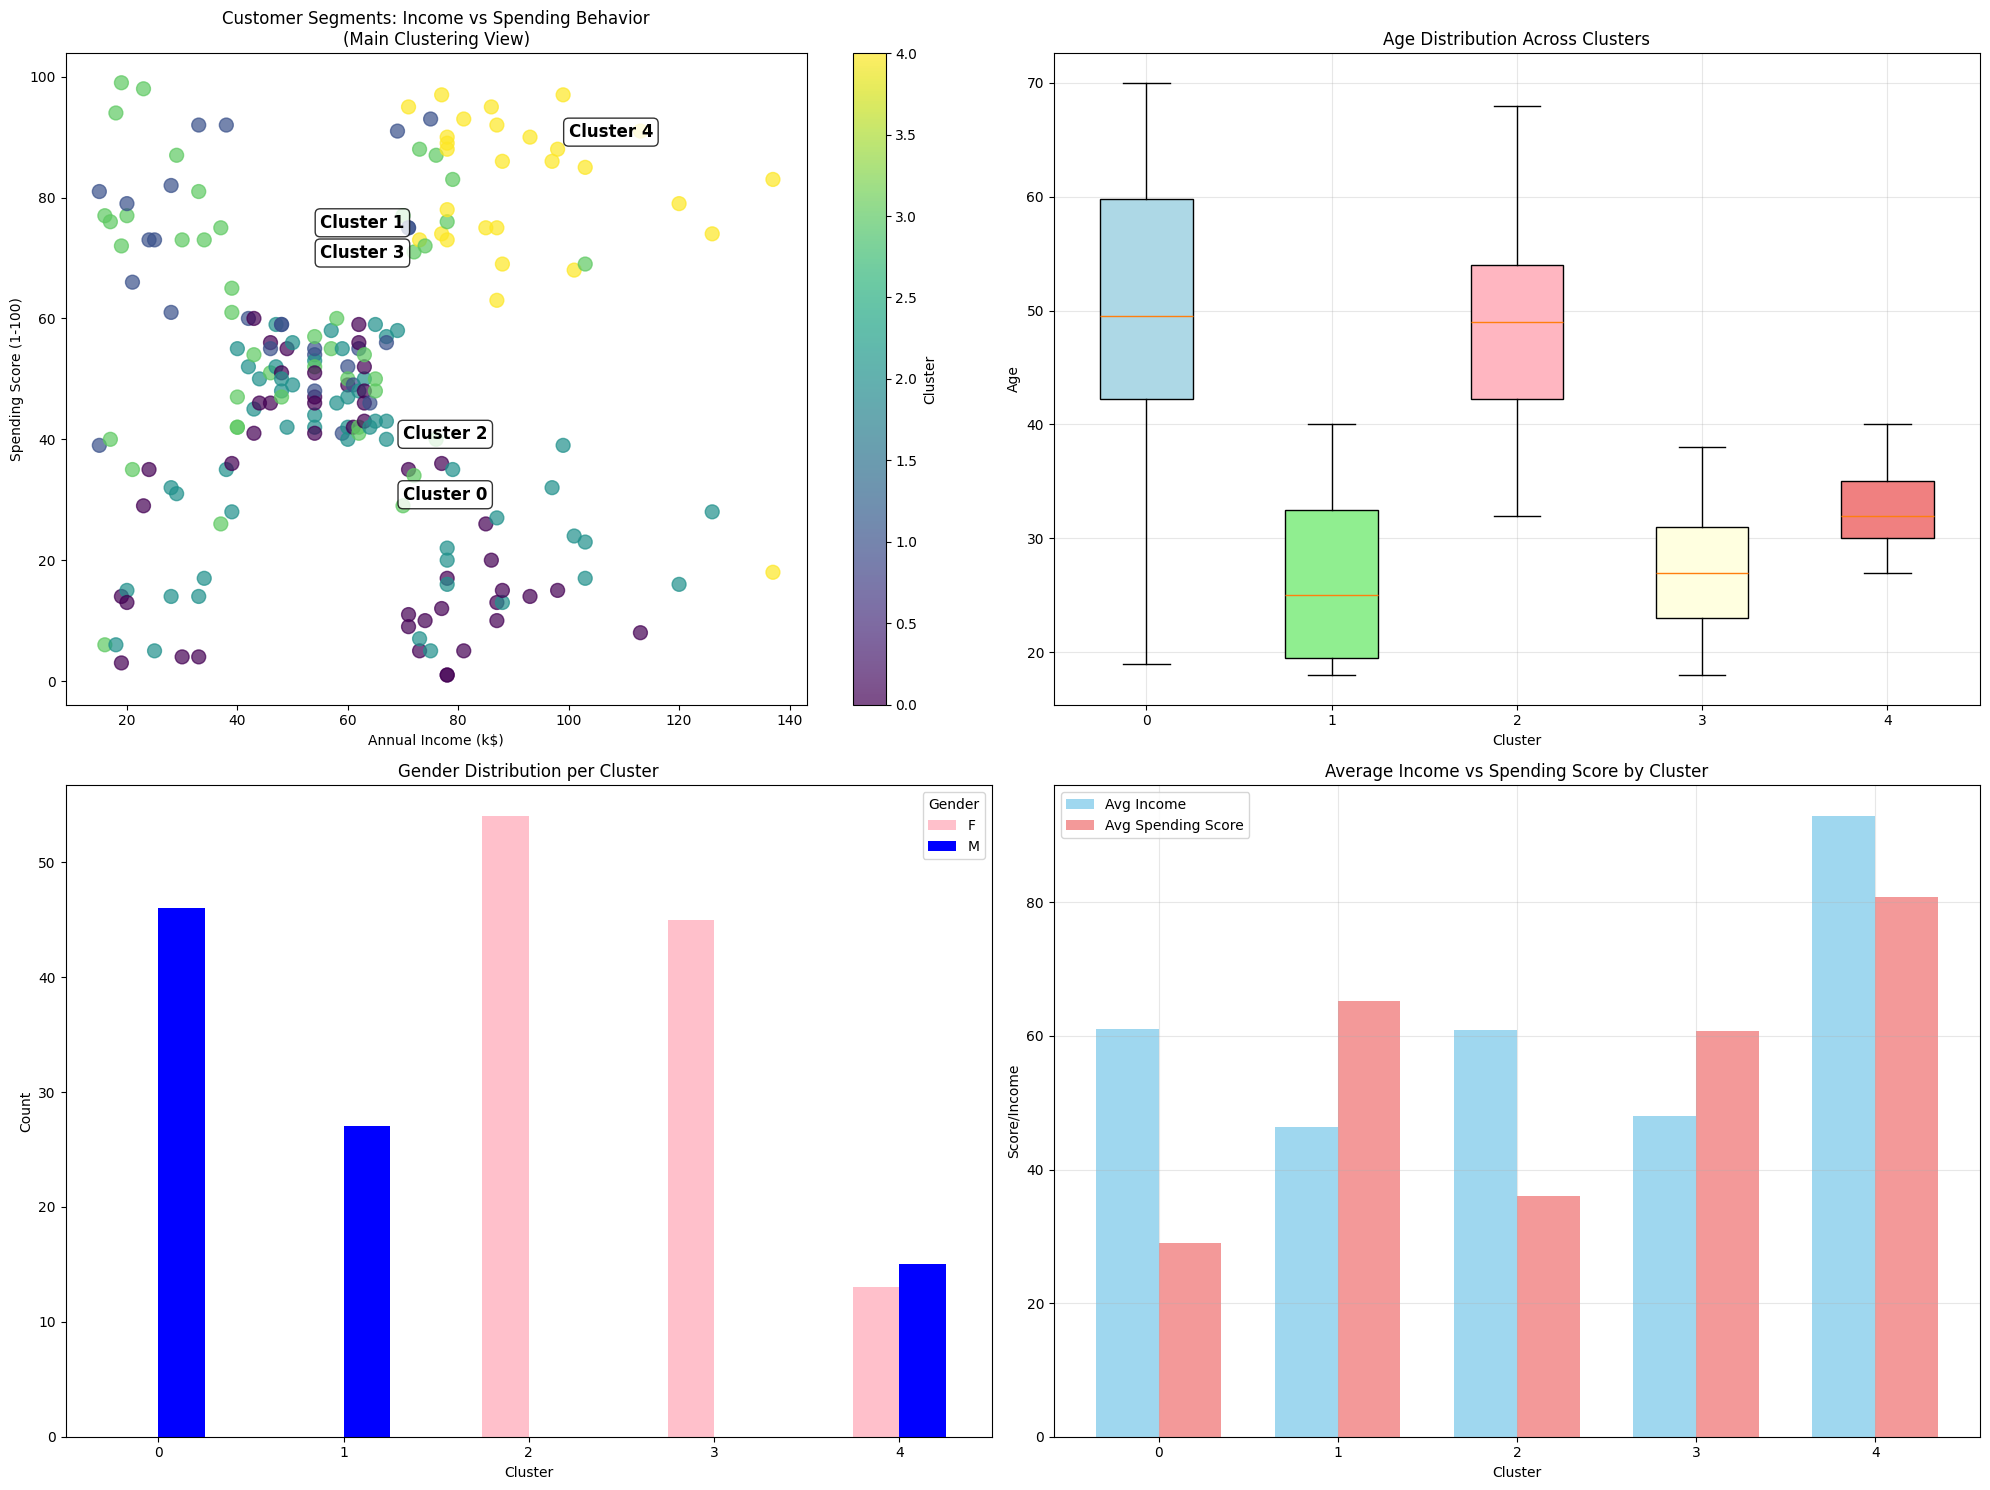

In [50]:
# Set the style for all plots
plt.style.use('default')

# 1. FIRST, DEFINE THE MARKETING STRATEGY FUNCTION
def get_marketing_strategy(cluster_num):
    strategies = {
        0: "Focus on value-for-money products, durability, and discounts. Avoid trendy marketing.",
        1: "Target with trendy items, social media campaigns, and impulse-buy opportunities. Payment plan options.",
        2: "Family-oriented marketing, practical items, and loyalty programs. Highlight reliability and value.",
        3: "Fashion-focused campaigns, influencer marketing, and seasonal collections. Create a sense of trendiness.",
        4: "Premium experiences, exclusive access, personal shopping, and luxury brands. Focus on quality and exclusivity, not price."
    }
    return strategies.get(cluster_num, "General marketing")

# 2. CREATE THE VISUALIZATIONS
fig = plt.figure(figsize=(20, 15))

# Chart 1: MAIN CLUSTER VISUALIZATION (Income vs Spending)
plt.subplot(2, 2, 1)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Income vs Spending Behavior\n(Main Clustering View)')

# Add cluster annotations
cluster_positions = {
    0: (65, 25),   # Cautious Middle-Aged Men
    1: (50, 70),   # Young Thrill-Seeking Men
    2: (65, 35),   # Frugal Middle-Aged Women
    3: (50, 65),   # Young Trendy Women
    4: (95, 85)    # Wealthy & Successful Families
}

for cluster_num, pos in cluster_positions.items():
    plt.annotate(f'Cluster {cluster_num}', xy=pos, xytext=(pos[0]+5, pos[1]+5),
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Chart 2: AGE DISTRIBUTION ACROSS CLUSTERS
plt.subplot(2, 2, 2)
age_data = [df[df['Cluster'] == i]['Age'] for i in range(5)]
box = plt.boxplot(age_data, patch_artist=True, labels=range(5))

# Add colors to boxes
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution Across Clusters')
plt.grid(True, alpha=0.3)

# Chart 3: GENDER DISTRIBUTION PER CLUSTER
plt.subplot(2, 2, 3)
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'])
gender_cluster.plot(kind='bar', color=['pink', 'blue'], ax=plt.gca())
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender Distribution per Cluster')
plt.legend(title='Gender')
plt.xticks(rotation=0)

# Chart 4: AVERAGE INCOME & SPENDING COMPARISON
plt.subplot(2, 2, 4)
clusters = range(5)
width = 0.35

plt.bar([x - width/2 for x in clusters], cluster_profile['Annual Income (k$)'], 
        width, label='Avg Income', color='skyblue', alpha=0.8)
plt.bar([x + width/2 for x in clusters], cluster_profile['Spending Score (1-100)'], 
        width, label='Avg Spending Score', color='lightcoral', alpha=0.8)

plt.xlabel('Cluster')
plt.ylabel('Score/Income')
plt.title('Average Income vs Spending Score by Cluster')
plt.xticks(clusters)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Summary Insights:

In [51]:
# 3. PRINT THE TEXTUAL SUMMARY (Now it can safely call the function above)
print("="*60)
print("CUSTOMER SEGMENTATION ANALYSIS SUMMARY")
print("="*60)

cluster_names = {
    0: "Cautious Middle-Aged Men",
    1: "Young Thrill-Seeking Men", 
    2: "Frugal Middle-Aged Women",
    3: "Young Trendy Women",
    4: "Wealthy & Successful Families"
}

for cluster_num in range(5):
    print(f"\n{'#'*50}")
    print(f"CLUSTER {cluster_num}: {cluster_names[cluster_num]}")
    print(f"{'#'*50}")
    
    print(f"📊 Key Metrics:")
    print(f"   • Average Age: {cluster_profile.loc[cluster_num, 'Age']:.1f} years")
    print(f"   • Average Income: ${cluster_profile.loc[cluster_num, 'Annual Income (k$)']:.1f}k")
    print(f"   • Spending Score: {cluster_profile.loc[cluster_num, 'Spending Score (1-100)']:.1f}/100")
    
    # Gender analysis
    gender_counts = pd.crosstab(df['Cluster'], df['Gender']).loc[cluster_num]
    if gender_counts['F'] > 0 and gender_counts['M'] > 0:
        total = gender_counts['F'] + gender_counts['M']
        print(f"   • Gender: Mixed ({gender_counts['F']} Female, {gender_counts['M']} Male)")
    else:
        dominant_gender = 'Female' if gender_counts['F'] > 0 else 'Male'
        print(f"   • Gender: Exclusively {dominant_gender}")
    
    # Behavioral insight
    income = cluster_profile.loc[cluster_num, 'Annual Income (k$)']
    spending = cluster_profile.loc[cluster_num, 'Spending Score (1-100)']
    
    if income > 80 and spending > 70:
        print(f"   💡 Behavior: HIGH VALUE - Big spenders with high income")
    elif income < 50 and spending > 60:
        print(f"   💡 Behavior: SPENDTHRIFT - Spends beyond means")
    elif income > 50 and spending < 40:
        print(f"   💡 Behavior: CAUTIOUS - Saves despite good income")
    elif income < 50 and spending < 40:
        print(f"   💡 Behavior: BUDGET-CONSCIOUS - Low income, low spending")
    else:
        print(f"   💡 Behavior: MODERATE - Balanced spending habits")
    
    # THIS WILL NOW WORK WITHOUT ERROR
    print(f"   🎯 Marketing Strategy: {get_marketing_strategy(cluster_num)}")

CUSTOMER SEGMENTATION ANALYSIS SUMMARY

##################################################
CLUSTER 0: Cautious Middle-Aged Men
##################################################
📊 Key Metrics:
   • Average Age: 50.0 years
   • Average Income: $61.0k
   • Spending Score: 29.0/100
   • Gender: Exclusively Male
   💡 Behavior: CAUTIOUS - Saves despite good income
   🎯 Marketing Strategy: Focus on value-for-money products, durability, and discounts. Avoid trendy marketing.

##################################################
CLUSTER 1: Young Thrill-Seeking Men
##################################################
📊 Key Metrics:
   • Average Age: 26.6 years
   • Average Income: $46.4k
   • Spending Score: 65.2/100
   • Gender: Exclusively Male
   💡 Behavior: SPENDTHRIFT - Spends beyond means
   🎯 Marketing Strategy: Target with trendy items, social media campaigns, and impulse-buy opportunities. Payment plan options.

##################################################
CLUSTER 2: Frugal Middle-Ag